In [2]:
#This code is taken from examples of keras-team and modified for machine learning course of U. Tsykuba by JS
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

#Setup training and test samples

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print('shape of a single image:', x_train[0].shape)

# convert class vectors to binary class matrices
y_train_b=y_train
y_test_b=y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
shape of a single image: (28, 28, 1)


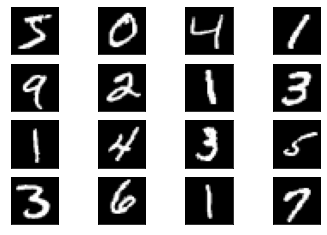

In [3]:
#Show training samples

import matplotlib.pyplot as plt

num = 4
for i in range(num):
  for j in range(num):
    ax=plt.subplot(num, num, i*num+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(x_train[i*num+j].reshape(28, 28), 'gray')
plt.show()


In [4]:

#model construction
WEIGHTS_FNAME = 'mnist_cnn_weights.hdf'

model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6), 
                 activation='relu',
                 input_shape=input_shape)) 
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 32)        1184      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               663680    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [5]:

#model training and evaluation
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
model.save_weights(WEIGHTS_FNAME)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 185us/step - loss: 0.2266 - accuracy: 0.9313 - val_loss: 0.0460 - val_accuracy: 0.9850
Epoch 2/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0725 - accuracy: 0.9790 - val_loss: 0.0311 - val_accuracy: 0.9888
Epoch 3/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0541 - accuracy: 0.9844 - val_loss: 0.0278 - val_accuracy: 0.9899
Epoch 4/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0226 - val_accuracy: 0.9919
Epoch 5/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 6/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0227 - val_accuracy: 0.9923
Epoch 7/15
60000/60000 [==============================] - 4s 67us/

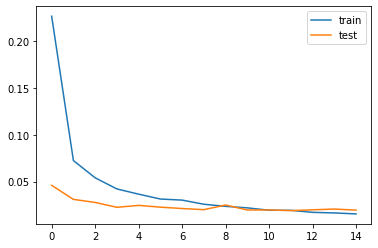

In [6]:
from matplotlib import pyplot

# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()



In [7]:
#Detailed performance evaluation
#https://github.com/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb

import numpy as np
Y_pred = model.predict(x_test)
# Convert one-hot to index

y_pred = np.argmax(Y_pred, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_b, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



conv2d_1 (6, 6, 1, 32)
channel:0


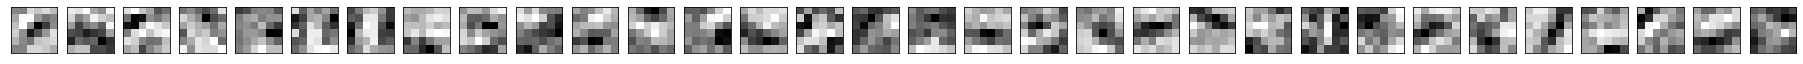

In [8]:
#Show filters of first conv layers
#https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
from matplotlib import pyplot

# summarize filter shapes
layer=model.layers[0]

filters, biases = layer.get_weights()
print(layer.name, filters.shape)
#normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters = filters.shape[3]
n_channels = filters.shape[2]

column= round(n_filters/32)
row=round(n_filters/column)
f, ax = plt.subplots()
for k in range(1):
  print('channel:' + str(k))
  for i in range(row):
    for j in range(column):
    # get the filter
      filt = filters[:, :, k, i*column+j-1]
      # specify subplot and turn of axi
      ax = pyplot.subplot(column, row, i*column+j+1)
      ax.set_xticks([])
      ax.set_yticks([])
      f.set_figheight(1)
      f.set_figwidth(32)
      pyplot.imshow(filt[:, :], 'gray')
    # show the figure
  pyplot.show()


conv2d_2 (6, 6, 32, 64)
channel:0


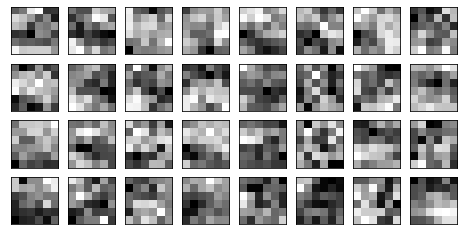

channel:1


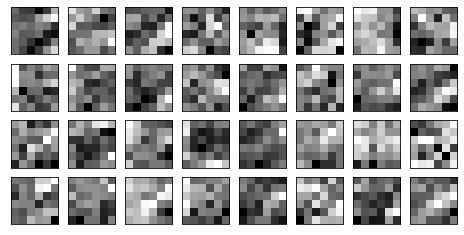

channel:2


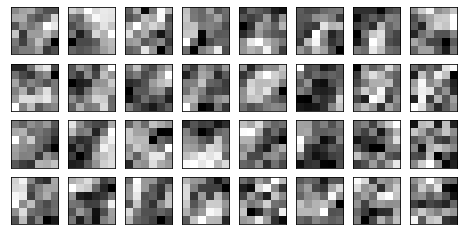

channel:3


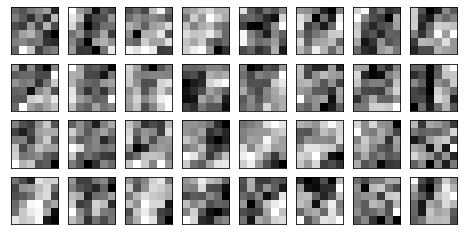

In [9]:
#Show filters of second conv layers

layer=model.layers[1]

filters, biases = layer.get_weights()
print(layer.name, filters.shape)
#normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters = filters.shape[3]
n_channels = filters.shape[2]

column= round(n_channels/8)
row=round(n_channels/column)

for k in range(4):
  f, ax = plt.subplots()
  print('channel:' + str(k))
  for i in range(row):
    for j in range(column):
    # get the filter
      filt = filters[:, :, i*column+j-1,k]
      # specify subplot and turn of axi
      ax = pyplot.subplot(column, row, i*column+j+1)
      ax.set_xticks([])
      ax.set_yticks([])
      f.set_figheight(4)
      f.set_figwidth(8)
      pyplot.imshow(filt[:, :], 'gray')
    # show the figure
  pyplot.show()


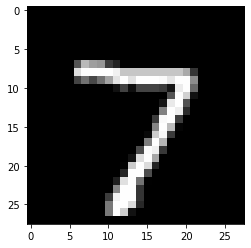

(28, 28)
Predicted class is: 7
Shape of feature map at the first layer conv2D:(10000, 23, 23, 32)


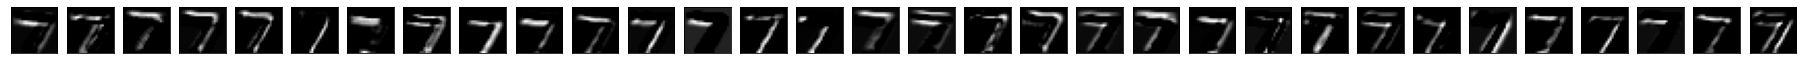

In [10]:
#Feature maps obtained with application of the first layer

from keras import models

image = x_test[0].reshape(28, 28)
plt.imshow(image, 'gray')
plt.show()
print(image.shape)


Y_pred = model.predict(x_test)
# Convert one-hot to index

y_pred = np.argmax(Y_pred, axis=1)
print("Predicted class is:",y_pred[0])

layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(x_test) # Returns a list of five Numpy arrays: one array per layer activation


first_layer_activation = activations[0]
print("Shape of feature map at the first layer conv2D:"+str(first_layer_activation.shape))

row = 32
column = int(first_layer_activation.shape[3]/row)
k=0
f, ax = plt.subplots()
for i in range(row):
  for j in range(column):
    fmap = first_layer_activation[0, :, :, k]
    ax = pyplot.subplot(column, row, i*column+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(fmap, 'gray')
    f.set_figheight(1)
    f.set_figwidth(32)
    k+=1
     # show the figure
pyplot.show()




Shape of feature map at the second layer conv2D:(10000, 18, 18, 64)


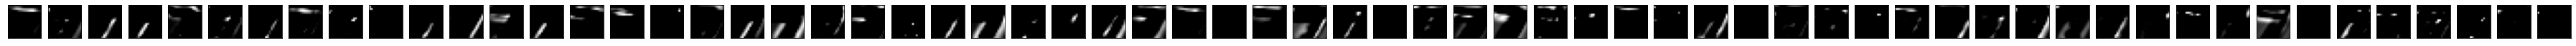

In [11]:
#Feature maps obtained with application of the second layer

second_layer_activation = activations[1]
print("Shape of feature map at the second layer conv2D:"+str(second_layer_activation.shape))

row = 64
column = int(second_layer_activation.shape[3]/row)
k=0
f, ax = plt.subplots()
for i in range(row):
  for j in range(column):
    fmap = second_layer_activation[0, :, :, k]
    ax = pyplot.subplot(column, row, i*column+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(fmap, 'gray')
    f.set_figheight(1)
    f.set_figwidth(64)
    k+=1
     # show the figure
pyplot.show()




Shape of feature map at the third layer maxPooling:(10000, 9, 9, 64)


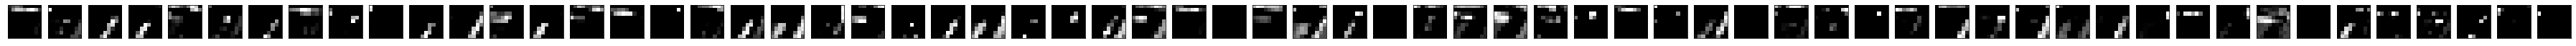

In [13]:
#Feature maps obtained with application of the third layer

third_layer_activation = activations[2]
print("Shape of feature map at the third layer maxPooling:"+str(third_layer_activation.shape))
row = 64
column = int(third_layer_activation.shape[3]/row)
k=0
f, ax = plt.subplots()
for i in range(row):
  for j in range(column):
    fmap = third_layer_activation[0, :, :, k]
    ax = pyplot.subplot(column, row, i*column+j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(fmap, 'gray')
    f.set_figheight(1)
    f.set_figwidth(64)
    k+=1
     # show the figure
pyplot.show()

In [12]:
#Feature vectors (flattened) for dense layers 
fifth_layer_activation = activations[4]
print("Shape of feature vetor  at the fifth layer:"+str(fifth_layer_activation.shape))
print(fifth_layer_activation[0, :])


Shape of feature vetor  at the fifth layer:(10000, 5184)
[0.33405986 0.         0.         ... 0.         0.         0.        ]
